## COP and COG estimation by derivative method
Trying to estimate COP and COG were used linear function wich didn't give the results expected, therefore we tried to make different approaches and one of them is the next function:
COP= COG-(4/g*3*d²derivadasegundaTeta)

## Python libraries

First, let's import the necessary Python libraries and configure the environment:

In [42]:
import numpy as np
#from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.3,
#                rc={'lines.linewidth': 1.5, 'lines.markersize': 14, 'axes.titlesize': 'x-large'})
#matplotlib.rc('legend', numpoints=1, fontsize=14)
#import glob
import sys, os
sys.path.insert(1, r'./Functions')
# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

Versions of the Python libraries used:

In [43]:
#!pip install version_information
%load_ext version_information
%version_information numpy, scipy, pandas, matplotlib, seaborn

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.8.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.22.0
OS Windows 10 10.0.22000 SP0
numpy 1.20.1
scipy 1.6.2
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1
Fri Nov 26 11:07:01 2021 Hora oficial do Brasil

## Meta data

The file `PDSinfo.txt` contains meta data about the subjects and the experimental trials. The file has a header plus 588 rows per 29 columns (there are 12 rows for each of the 49 subjects).   
Let's use the power of the [pandas](http://pandas.pydata.org/) library to load and explore the meta data:

In [44]:
# GitHub URL:
#path2 = 'C:\Users\ferna\Downloads\IC- dados\Dados'
# local directory:
path2 = r'C:\\Users\\ferna\\Downloads\\IC- dados\\Dados'
fname = os.path.join(path2, 'PDSinfo.txt')
PDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print(fname)
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(PDSinfo.Subject)), PDSinfo.shape[0], PDSinfo.shape[1]))

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDSinfo.txt
Information of 49 subjects loaded (588 rows, 29 columns).


Here are the first 12 rows and first 10 columns of meta data:

## COP and COG displacements

Let's load the force plate and kinematics data of one subject:

In [62]:
fname_grf = os.path.join(path2, PDSinfo.Trial[150] + 'grf' + '.txt') 
fname_mkr = os.path.join(path2, PDSinfo.Trial[150] + 'mkr' + '.txt')
grf1 = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
mkr1 = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
print(fname_grf, grf.shape)
print(fname_mkr, mkr.shape)

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDS13CR1grf.txt (6000, 21)
C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDS13CR1mkr.txt (6000, 130)


To calculate the distance in the equation we did the square root of the sum of COG in the 3 dimensions sqaured:

In [63]:
COGX1=mkr1['COG_X']
COGY1=mkr1['COG_Y']
COGZ1=mkr1['COG_Z']
d1= (COGX1**2+COGY1**2+COGZ1**2)**0.5

Para calcularmos a derivada do ângulo primeiro precisamos achar o próprio ângulo que será dado pelo arcsen(COG/d)

In [64]:
angulox= np.arcsin(COGX1/d1)
anguloz=np.arcsin(COGZ1/d1)
matrizangx=np.array(angulox[30:])
matrizangz=np.array(anguloz[30:])

Para chegarmos na primeira derivada devemos usar a seguinte fórmula 
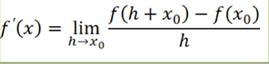, onde h+x0 seria a próxima posição, xo a posição em questão e h a variação do tempo

In [65]:
t=grf1['Time']
dt=t[1]-t[0]
d1x=np.zeros(len(matrizangx))
d1z=np.zeros(len(matrizangz))
for i  in range(0,len(matrizangx)-1):
    prox=i+1
    d1x[i]=(matrizangx[prox]-matrizangx[i])/dt
    d1z[i]=(matrizangz[prox]-matrizangz[i])/dt
print(d1x)

[-0.00714961 -0.00690753 -0.00656982 ... -0.00207621 -0.00217171
  0.        ]


Fazemos então a segunda derivada:

In [66]:
d2x=np.zeros(len(d1x))
d2z=np.zeros(len(d1z))
for i in range(0,30):
    prox=i+1
    d2x[i]=(d1x[i+1]-d1x[i])/dt
    d2z[i]=(d1z[i+1]-d1z[i])/dt
print(d2x)

[0.02420806 0.03377094 0.02642648 ... 0.         0.         0.        ]


Com as derivadas feitas, precisamos fazer a função em si:

In [67]:
COPX1= COGX1[30:] - (4/3)*(d1[30:]**4)*(1/9.8)*d2x
COPZ1= COGZ1[30:] - (4/3)*(d1[30:]**4)*(1/9.8)*d2z

Para fazer o gráfico comparando o real e o estimado primeiro precisamos do real:

In [68]:
COPXreal1=grf1['COPNET_X']
COPZreal1=grf1['COPNET_Z']

Text(0, 0.5, 'COP')

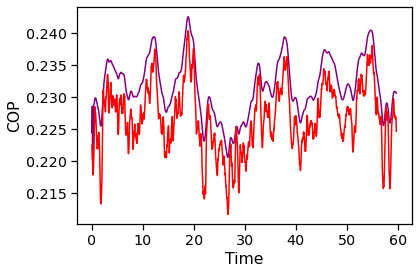

In [69]:
plt.plot(t[:-30],COPX1,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPXreal1[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Text(0, 0.5, 'COP')

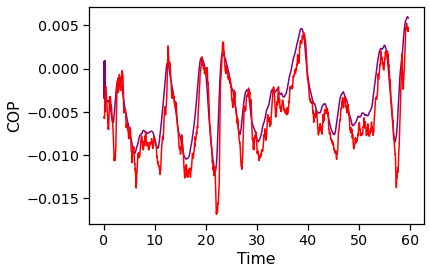

In [70]:
plt.plot(t[:-30],COPZ1,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZreal1[:-30],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Now we do the same for other 9 subjects

In [85]:
fname_grf2 = os.path.join(path2,PDSinfo.Trial[44]+'grf'+'.txt')
fname_mkr2 = os.path.join(path2,PDSinfo.Trial[44]+'mkr'+'.txt')
grf2=pd.read_csv(fname_grf2, delimiter='\t',header=0,engine='c')
mkr2=pd.read_csv(fname_mkr2, delimiter='\t', header=0, engine='c')

In [86]:
COGX2=mkr2['COG_X']
COGY2=mkr2['COG_Y']
COGZ2=mkr2['COG_Z']
d2=(COGX2**2+COGY2**2+COGZ2**2)**0.5

In [87]:
angulox2=np.arcsin(COGX2/d2)
anguloz2=np.arcsin(COGZ2/d2)
matrizangx2=np.array(angulox2[30:])
matrizangz2=np.array(anguloz2[30:])

In [88]:
t=grf2['Time']
dt=t[1]-t[0]
d1x2=np.zeros(len(matrizangx2))
d1z2=np.zeros(len(matrizangz2))
for i in range(0,len(matrizangx2)-1):
    prox=i+1
    d1x2[i]=(matrizangx2[prox]-matrizangx2[i])/dt
    d1z2[i]=(matrizangz2[prox]-matrizangz2[i])/dt

In [89]:
d2x2=np.zeros(len(d1x2))
d2z2=np.zeros(len(d1z2))
for i in range(0,30):
    prox=i+1
    d2x2[i]=(d1x2[prox]-d1x2[i])/dt
    d2z2[i]=(d1z2[prox]-d1z2[i])/dt

In [90]:
COPX2= COGX2[30:] -(4/3)*(d2[30:]**4)*(1/9.8)*d2x2
COPZ2= COGZ2[30:] -(4/3)*(d2[30:]**4)*(1/9.8)*d2z2

In [91]:
COPXreal2=grf2['COPNET_X']
COPZreal2=grf2['COPNET_Z']

Text(0, 0.5, 'COP')

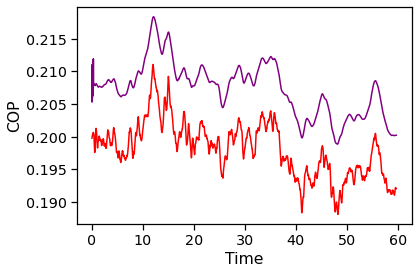

In [92]:
plt.plot(t[:-30],COPX2,marker='', color='purple', linestyle='-')
plt.plot(t[:-30],COPXreal2[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Text(0, 0.5, 'COP')

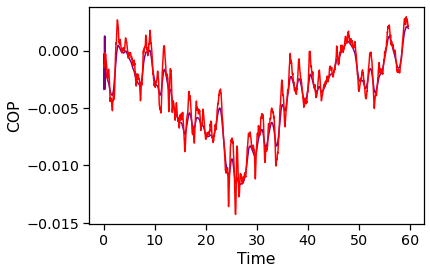

In [108]:
plt.plot(t[:-30],COPZ2,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZreal2[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [95]:
fname_grf3=os.path.join(path2,PDSinfo.Trial[5] + 'grf'+'.txt')
fname_mkr3=os.path.join(path2,PDSinfo.Trial[5]+'mkr'+'.txt')
grf3=pd.read_csv(fname_grf3, delimiter='\t',header=0, engine='c')
mkr3=pd.read_csv(fname_mkr3, delimiter='\t', header=0, engine='c')

In [96]:
COGX3=mkr3['COG_X']
COGY3=mkr3['COG_Y']
COGZ3=mkr3['COG_Z']
d3=(COGX3**2+COGY3**2+COGZ3**2)**0.5

In [99]:
angulox3=np.arcsin(COGX3/d3)
anguloz3=np.arcsin(COGZ3/d3)
matrizangx3=np.array(angulox3[30:])
matrizangz3=np.array(anguloz3[30:])

In [100]:
t3=grf3['Time']
dt3=t3[1]-t3[0]
d1x3=np.zeros(len(matrizangx3))
d1z3=np.zeros(len(matrizangz3))
for i in range(0,len(matrizangx3)-1):
    prox=i+1
    d1x3[i]=(matrizangx3[prox]-matrizangx3[i])/dt3
    d1z3[i]=(matrizangz3[prox]-matrizangz3[i])/dt3

In [101]:
d2x3=np.zeros(len(d1x3))
d2z3=np.zeros(len(d1z3))
for i in range(0,30):
    prox=i+1
    d2x3[i]=(d1x3[prox]-d1x3[i])/dt3
    d2z3[i]=(d1z3[prox]-d1z3[i])/dt3

In [102]:
COPX3=COGX3[30:]-(4/3)*(d3[30:]**4)*(1/9.8)*d2x3
COPZ3=COGZ3[30:]-(4/3)*(d3[30:]**4)*(1/9.8)*d2z3

In [103]:
COPX3real=grf3['COPNET_X']
COPZ3real=grf3['COPNET_Z']

Text(0, 0.5, 'COP')

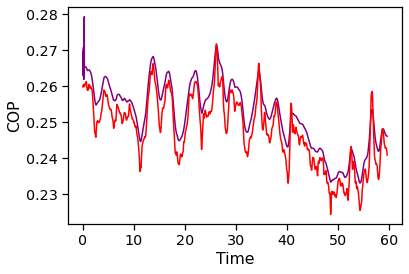

In [105]:
plt.plot(t[:-30],COPX3, marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPX3real[30:], marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Text(0, 0.5, 'COP')

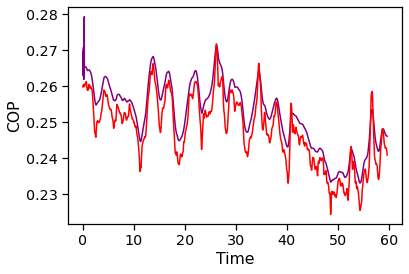

In [110]:
plt.plot(t[:-30],COPX3,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPX3real[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [111]:
fname_grf4=os.path.join(path2,PDSinfo.Trial[3]+'grf'+'.txt')
fname_mkr4=os.path.join(path2,PDSinfo.Trial[3]+'mkr'+'.txt')
grf4=pd.read_csv(fname_grf4,delimiter='\t',header=0,engine='c')
mkr4=pd.read_csv(fname_mkr4,delimiter='\t',header=0,engine='c')

In [112]:
COGX4=mkr4['COG_X']
COGY4=mkr4['COG_Y']
COGZ4=mkr4['COG_Z']
d4=(COGX4**2+COGY4*2+COGZ4**2)**0.5

In [113]:
angulox4=np.arcsin(COGX4/d4)
anguloz4=np.arcsin(COGZ4/d4)
matrizangx4=np.array(angulox4[30:])
matrizangz4=np.array(anguloz4[30:])

In [114]:
t4=grf4['Time']
dt4=t4[1]-t4[0]
d1x4=np.zeros(len(matrizangx4))
d1z4=np.zeros(len(matrizangz4))
for i in range(0,len(matrizangx4)-1):
    prox=i+1
    d1x4[i]=(matrizangx4[prox]-matrizangx4[i])/dt4
    d1z4[i]=(matrizangz4[prox]-matrizangz4[i])/dt4

In [116]:
d2x4=np.zeros(len(d1x4))
d2z4=np.zeros(len(d1z4))
for i in range(0,30):
    prox=i+1
    d2x4[i]=(d1x4[prox]-d1x4[i])/dt4
    d2z4[i]=(d2z4[prox]-d2z4[i])/dt4

In [121]:
COPX4= COGX4[30:] -(4/3)*(d4[30:]**4)*(1/9.8)*d2x4
COPZ4= COGZ4[30:] -(4/3)*(d4[30:]**4)*(1/9.8)*d2z4

In [122]:
COPX4real=grf4['COPNET_X']
COPZ4real=grf4['COPNET_Z']

Text(0, 0.5, 'COP')

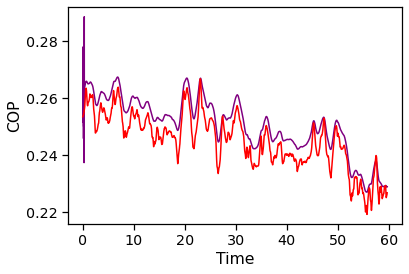

In [123]:
plt.plot(t[:-30],COPX4,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPX4real[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Text(0, 0.5, 'COP')

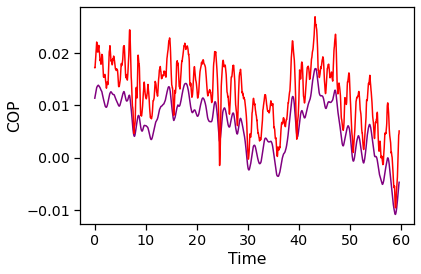

In [124]:
plt.plot(t[:-30],COPZ4,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZ4real[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [125]:
fname_grf5=os.path.join(path2,PDSinfo.Trial[63]+'grf'+'.txt')
fname_mkr5=os.path.join(path2,PDSinfo.Trial[63]+'mkr'+'.txt')
grf5=pd.read_csv(fname_grf5,delimiter='\t', header=0, engine='c')
mkr5=pd.read_csv(fname_mkr5,delimiter='\t', header=0, engine='c')

In [126]:
COGX5=mkr5['COG_X']
COGY5=mkr5['COG_Y']
COGZ5=mkr5['COG_Z']
d5=(COGX5**2+COGY5**2+COGZ5**2)**0.5

In [127]:
angulox5=np.arcsin(COGX5/d5)
anguloz5=np.arcsin(COGZ5/d5)
matrizangx5=np.array(angulox5[30:])
matrizangz5=np.array(anguloz5[30:])

In [128]:
t5=grf5['Time']
dt5=t5[1]-t5[0]
d1x5=np.zeros(len(matrizangx5))
d1z5=np.zeros(len(matrizangz5))
for i in range(0,len(matrizangx5)-1):
    prox=i+1
    d1x5[i]=(matrizangx5[prox]-matrizangx5[i])/dt5
    d1z5[i]=(matrizangz5[prox]-matrizangz5[i])/dt5

In [129]:
d2x5=np.zeros(len(d1x5))
d2z5=np.zeros(len(d1z5))
for i in range(0,30):
    prox=i+1
    d2x5[i]=(d1x5[prox]-d1x5[i])/dt5
    d2z5[i]=(d1z5[prox]-d1z5[i])/dt5

In [130]:
COPX5= COGX5[30:]- (4/3)*(d5[30:]**4)*(1/9.8)*d2x5
COPZ5= COGZ5[30:]-(4/3)*(d5[30:]**4)*(1/9.8)*d2z5

In [132]:
COPXreal5=grf5['COPNET_X']
COPZreal5=grf5['COPNET_Z']

Text(0, 0.5, 'COP')

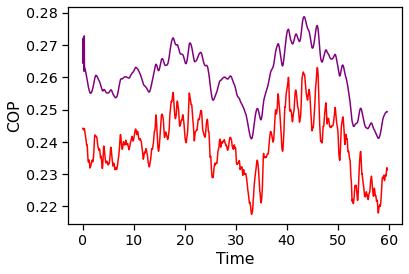

In [134]:
plt.plot(t[:-30],COPX5, marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPXreal5[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Text(0, 0.5, 'COP')

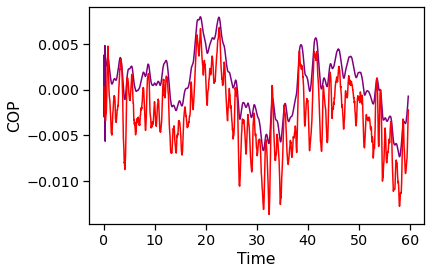

In [135]:
plt.plot(t[:-30],COPZ5, marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZreal5[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [137]:
fname_grf6=os.path.join(path2,PDSinfo.Trial[77]+'grf'+'.txt')
fname_mkr6=os.path.join(path2,PDSinfo.Trial[77]+'mkr'+'.txt')
grf6=pd.read_csv(fname_grf6,delimiter='\t',header=0,engine='c')
mkr6=pd.read_csv(fname_mkr6,delimiter='\t',header=0,engine='c')

In [140]:
COGX6=mkr6['COG_X']
COGY6=mkr6['COG_Y']
COGZ6=mkr6['COG_Z']
d6=(COGX6**2+COGY6**2+COGZ6**2)**0.5

In [141]:
angulox6=np.arcsin(COGX6/d6)
anguloz6=np.arcsin(COGZ6/d6)
matrizangx6=np.array(angulox6[30:])
matrizangz6=np.array(anguloz6[30:])

In [142]:
t6=grf6['Time']
dt6=t6[1]-t6[0]
d1x6=np.zeros(len(matrizangx6))
d1z6=np.zeros(len(matrizangz6))
for i in range(0,len(matrizangx6)-1):
    prox=i+1
    d1x6[i]=(matrizangx6[prox]-matrizangx[i])/dt6
    d1z6[i]=(matrizangz6[prox]-matrizangz6[i])/dt6

In [143]:
d2x6=np.zeros(len(d1x6))
d2z6=np.zeros(len(d1z6))
for i in range(0,30):
    prox=i+1
    d2x6[i]=(d1x6[prox]-d1x6[i])/dt6
    d2z6[i]=(d1z6[prox]-d1z6[i])/dt6

In [144]:
COPX6= COGX6[30:]-(4/3)*(d6[30:]**4)*(1/9.8)*d2x6
COPZ6= COGZ6[30:]-(4/3)*(d6[30:]**4)*(1/9.8)*d2z6

In [145]:
COPXreal6=grf6['COPNET_X']
COPZreal6=grf6['COPNET_Z']

Text(0, 0.5, 'COP')

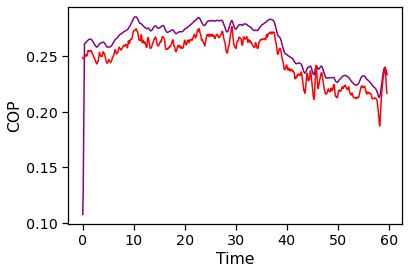

In [146]:
plt.plot(t[:-30],COPX6,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPXreal6[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Text(0, 0.5, 'COP')

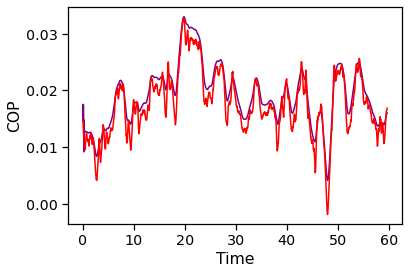

In [147]:
plt.plot(t[:-30],COPZ6, marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZreal6[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [148]:
fname_grf7=os.path.join(path2,PDSinfo.Trial[55]+'grf' + '.txt')
fname_mkr7=os.path.join(path2,PDSinfo.Trial[55]+'mkr'+ '.txt')
grf7=pd.read_csv(fname_grf7,delimiter='\t',header=0,engine='c')
mkr7=pd.read_csv(fname_mkr7,delimiter='\t',header=0,engine='c')

In [149]:
COGX7=mkr7['COG_X']
COGY7=mkr7['COG_Y']
COGZ7=mkr7['COG_Z']
d7=(COGX7**2+COGY7**2+COGZ7**2)*0.5

In [150]:
angulox7=np.arcsin(COGX7/d7)
anguloz7=np.arcsin(COGZ7/d7)
matrizangx7=np.array(angulox7[30:])
matrizangz7=np.array(anguloz7[30:])

In [151]:
t7=grf7['Time']
dt7=t7[1]-t7[0]
d1x7=np.zeros(len(matrizangx7))
d1z7=np.zeros(len(matrizangz7))
for i in range(0,len(matrizangx7)-1):
    prox=i+1
    d1x7[i]=(matrizangx7[prox]-matrizangx7[i])/dt7
    d1z7[i]=(matrizangz7[prox]-matrizangz7[i])/dt7

In [152]:
d2x7=np.zeros(len(d1x7))
d2z7=np.zeros(len(d1z7))
for i in range(0,30):
    prox=i+1
    d2x7=(d1x7[prox]-d1x7[i])/dt7
    d2z7=(d1z7[prox]-d1z7[i])/dt7

In [153]:
COPX7= COGX7[30:] - (4/3)*(d7[30:]**4)*(1/9.8)*d2x7
COPZ7= COGZ7[30:] - (4/3)*(d7[30:]**4)*(1/9.8)*d2z7

In [155]:
COPXreal7=grf7['COPNET_X']
COPZreal7=grf7['COPNET_Z']

Text(0, 0.5, 'COP')

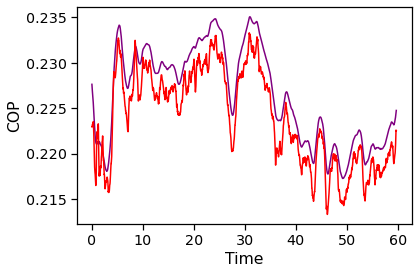

In [156]:
plt.plot(t[:-30],COPX7, marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPXreal7[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Text(0, 0.5, 'COP')

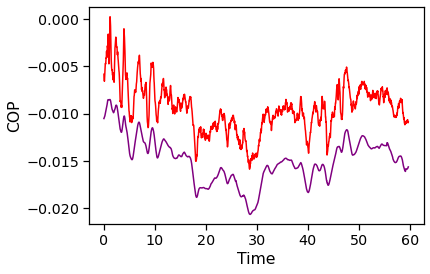

In [157]:
plt.plot(t[:-30], COPZ7, marker='',color='purple',linestyle='-')
plt.plot(t[:-30], COPZreal7[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')